In [2]:
import fastf1

In [ ]:
session = fastf1.get_event_by_round(1)
session

In [ ]:
event = fastf1.get_event(2021, 20)
event

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


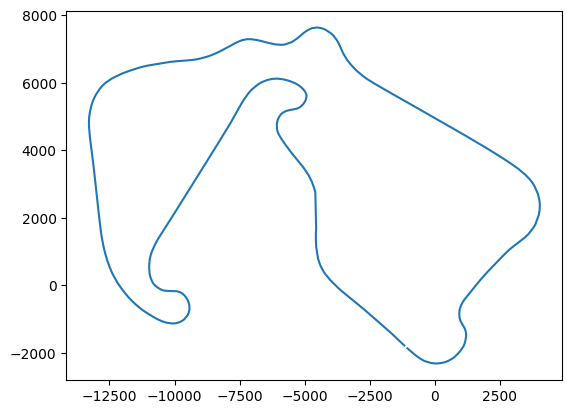

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import fastf1


session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Get an array of shape [n, 2] where n is the number of points and the second
# axis is x and y.
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radian.
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate and plot the track map.
rotated_track = rotate(track, angle=track_angle)
plt.plot(rotated_track[:, 0], rotated_track[:, 1])

offset_vector = [500, 0]  # offset length is chosen arbitrarily to 'look good'

core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/10/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Projects\FastF1_Exploration\.venv\Lib\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "c:\Projects\FastF1_Exploration\.venv\Lib\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\frank\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Users\frank\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 331, in begin
    version, status, reason = self._read_status()
       

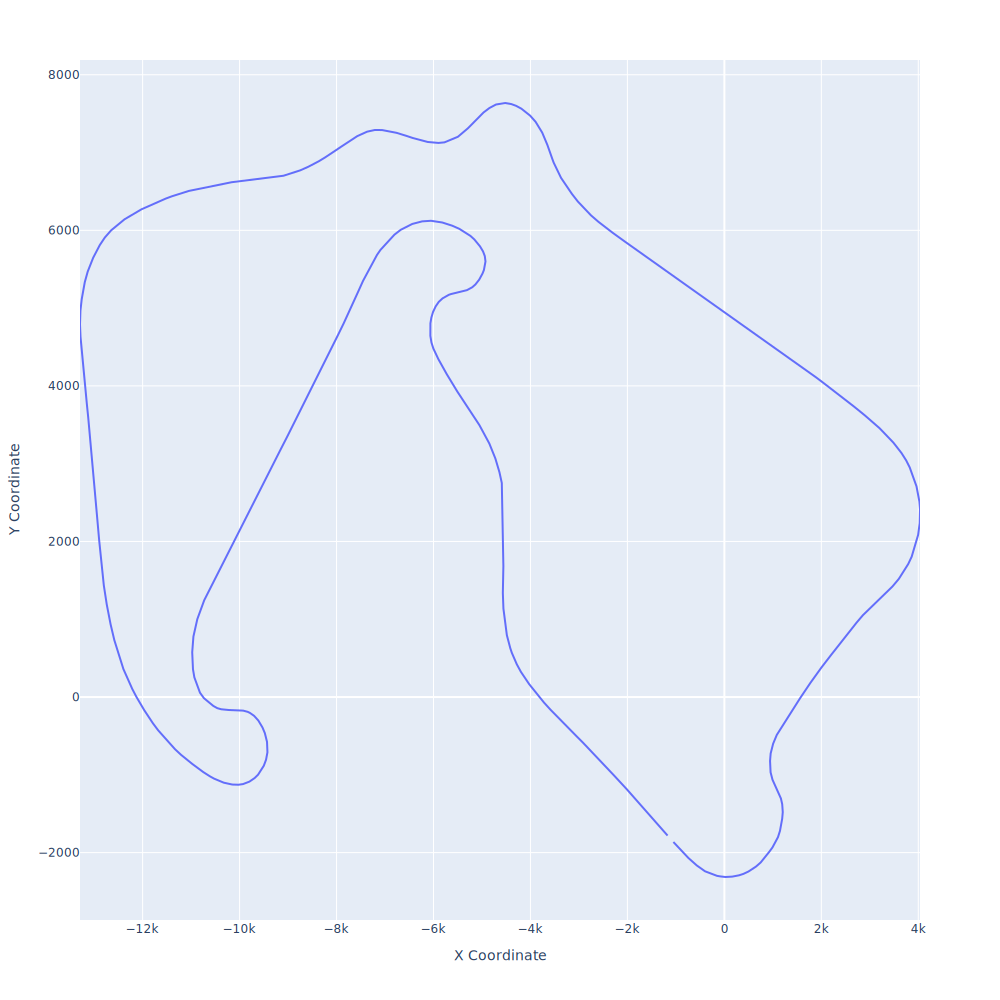

In [5]:
import numpy as np
import fastf1
import plotly.express as px

# Load session data
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Get the fastest lap and its position data
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

# Get circuit information
circuit_info = session.get_circuit_info()

def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Convert the position data into a numpy array
track = pos.loc[:, ('X', 'Y')].to_numpy()

# Convert the rotation angle from degrees to radians
track_angle = circuit_info.rotation / 180 * np.pi

# Rotate the track
rotated_track = rotate(track, angle=track_angle)

# Create a Plotly Express line plot to connect the points
fig = px.line(x=rotated_track[:, 0], y=rotated_track[:, 1])

# Customize the layout
fig.update_layout(#itle='Rotated Track Map',
                  #xaxis_title='X Coordinate',
                  #yaxis_title='Y Coordinate',
                  showlegend=False,
                  width=1000,
                  height=1000,
                  )

fig.show()